# Metadata

In [1]:
import numpy as np
import pandas as pd

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('final_cleaned_data.csv')

In [19]:
data.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,TotalPrice,Quantity,UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom,15.30,6,2.55
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,6,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom,22.00,8,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,6,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom,20.34,6,3.39


In [20]:
df =data.copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   InvoiceDate  401604 non-null  object 
 4   CustomerID   401604 non-null  float64
 5   Country      401604 non-null  object 
 6   TotalPrice   401604 non-null  float64
 7   Quantity     401604 non-null  int64  
 8   UnitPrice    401604 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 27.6+ MB


In [22]:

df['InvoiceDate'].dtype

dtype('O')

In [23]:
# Count of rows:
print("No of rows: ", df.shape[0])

# Count of columns
print("No of columns: ", df.shape[1])

# Column Names
columns = df.columns.to_list()
print("Columns are: \n", columns)

No of rows:  401604
No of columns:  9
Columns are: 
 ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID', 'Country', 'TotalPrice', 'Quantity', 'UnitPrice']


In [24]:
#data types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
InvoiceDate     object
CustomerID     float64
Country         object
TotalPrice     float64
Quantity         int64
UnitPrice      float64
dtype: object

In [25]:
# Count of Duplicate
print("Count of duplicate: ")
df.duplicated().sum()

Count of duplicate: 


np.int64(0)

In [26]:
# Count of Null
print("Couunt of Null: ")
df.isnull().sum()

Couunt of Null: 


InvoiceNo      0
StockCode      0
Description    0
InvoiceDate    0
CustomerID     0
Country        0
TotalPrice     0
Quantity       0
UnitPrice      0
dtype: int64

# EDA

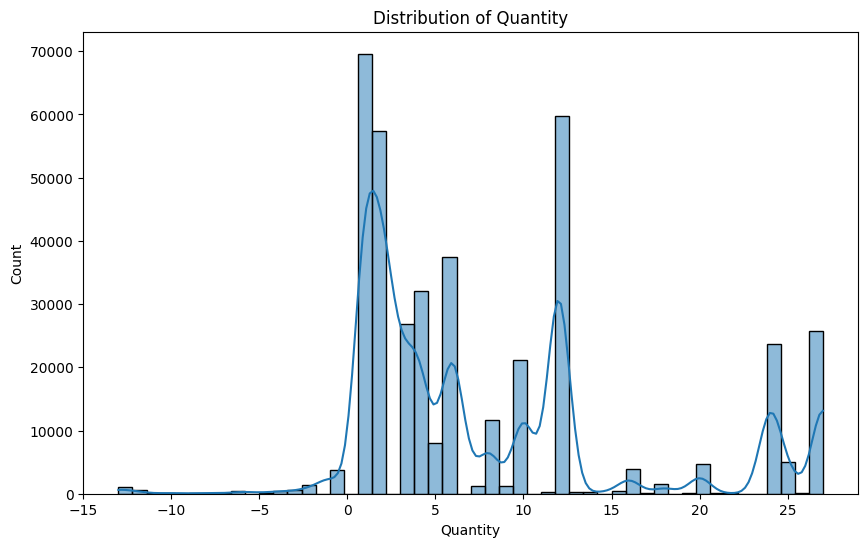

In [57]:
# A. Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()
plt.close()

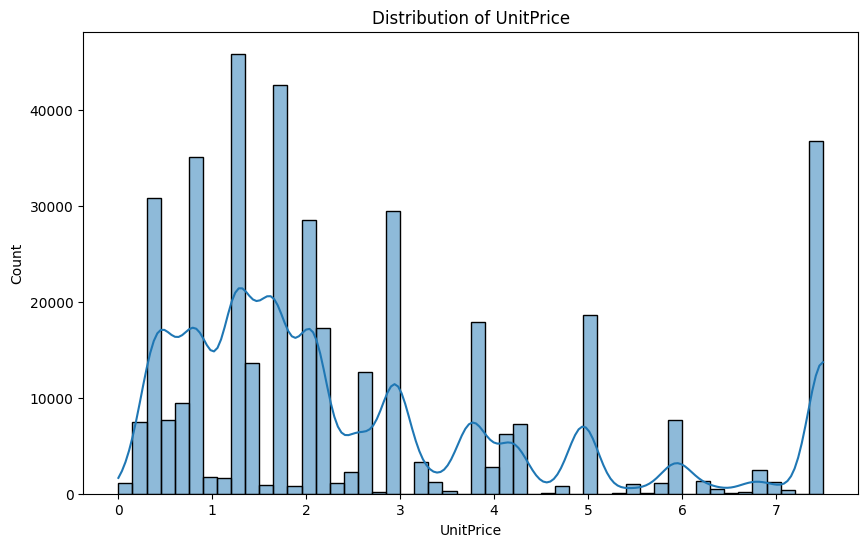

In [59]:
# B. Distribution of UnitPrice
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Count')
plt.show()
plt.close()


C:\Users\TANMOY\AppData\Local\Temp\ipykernel_3800\3381128683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


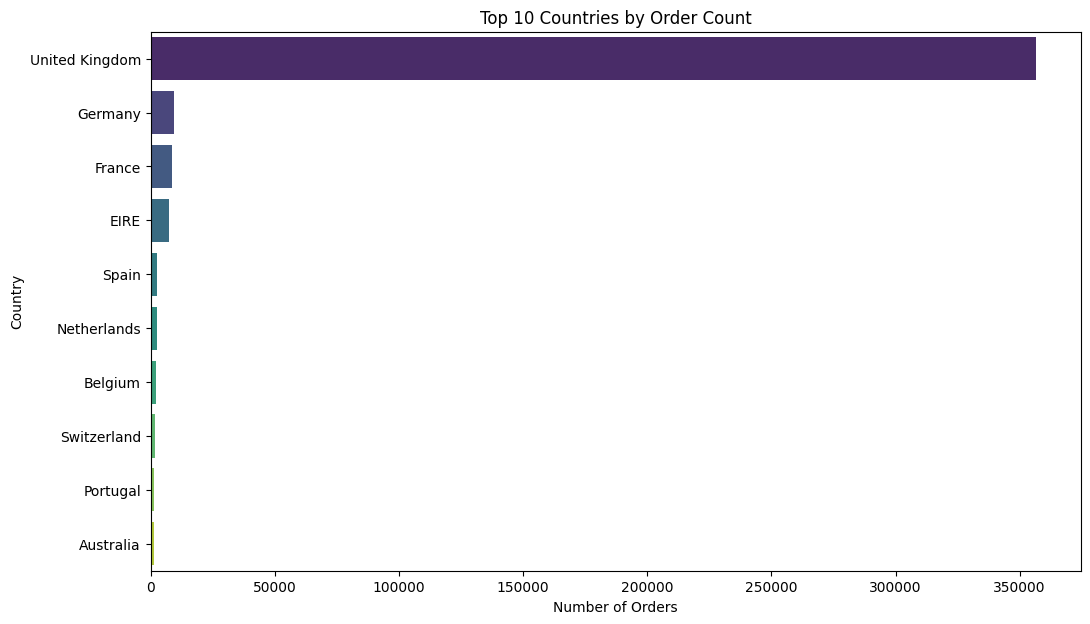

In [60]:
# C. Top 10 Countries by Order Count
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.show()
plt.close()

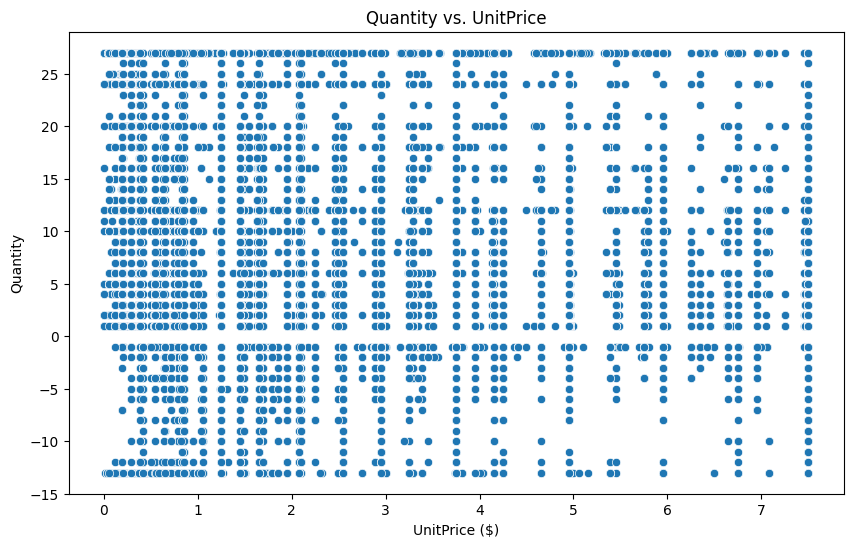

In [62]:
# A. Quantity vs. UnitPrice Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data =df)
plt.title('Quantity vs. UnitPrice')
plt.xlabel('UnitPrice ($)')
plt.ylabel('Quantity')
plt.show()
plt.close()

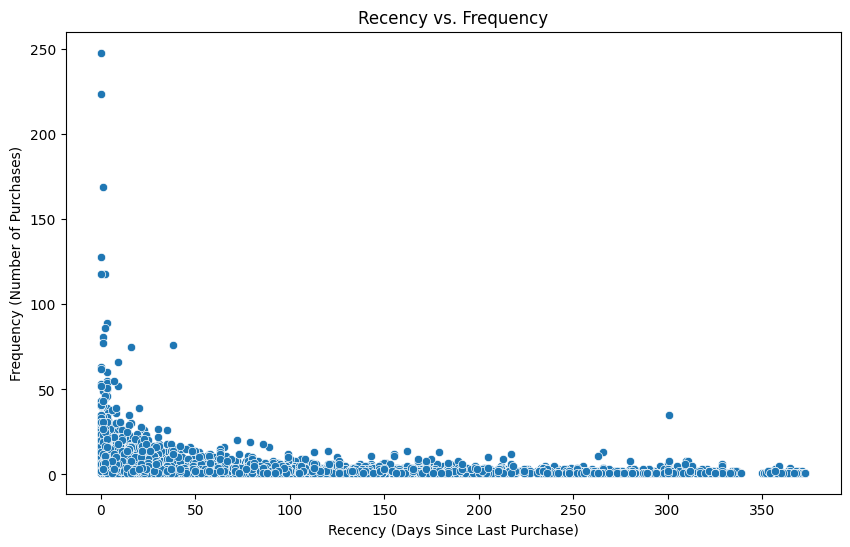

In [64]:
#  RFM Analysis 
# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
# Find the most recent date in the dataset
most_recent_date = df['InvoiceDate'].max()
# Aggregate data to create RFM features
rfm_data = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (most_recent_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

# Recency vs. Frequency Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', data=rfm_data)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Number of Purchases)')
plt.show()
plt.close()


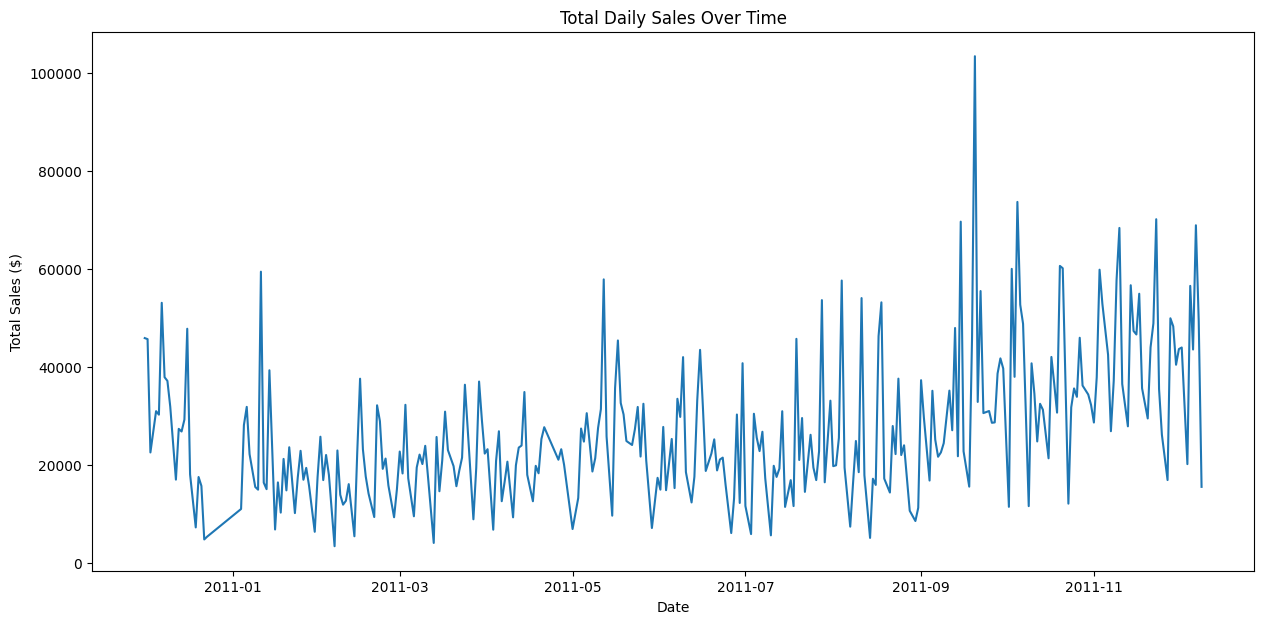

In [65]:
# Daily Sales Trend
df['Date'] = df['InvoiceDate'].dt.date
daily_sales = df.groupby('Date')['TotalPrice'].sum()
plt.figure(figsize=(15, 7))
daily_sales.plot()
plt.title('Total Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()
plt.close()

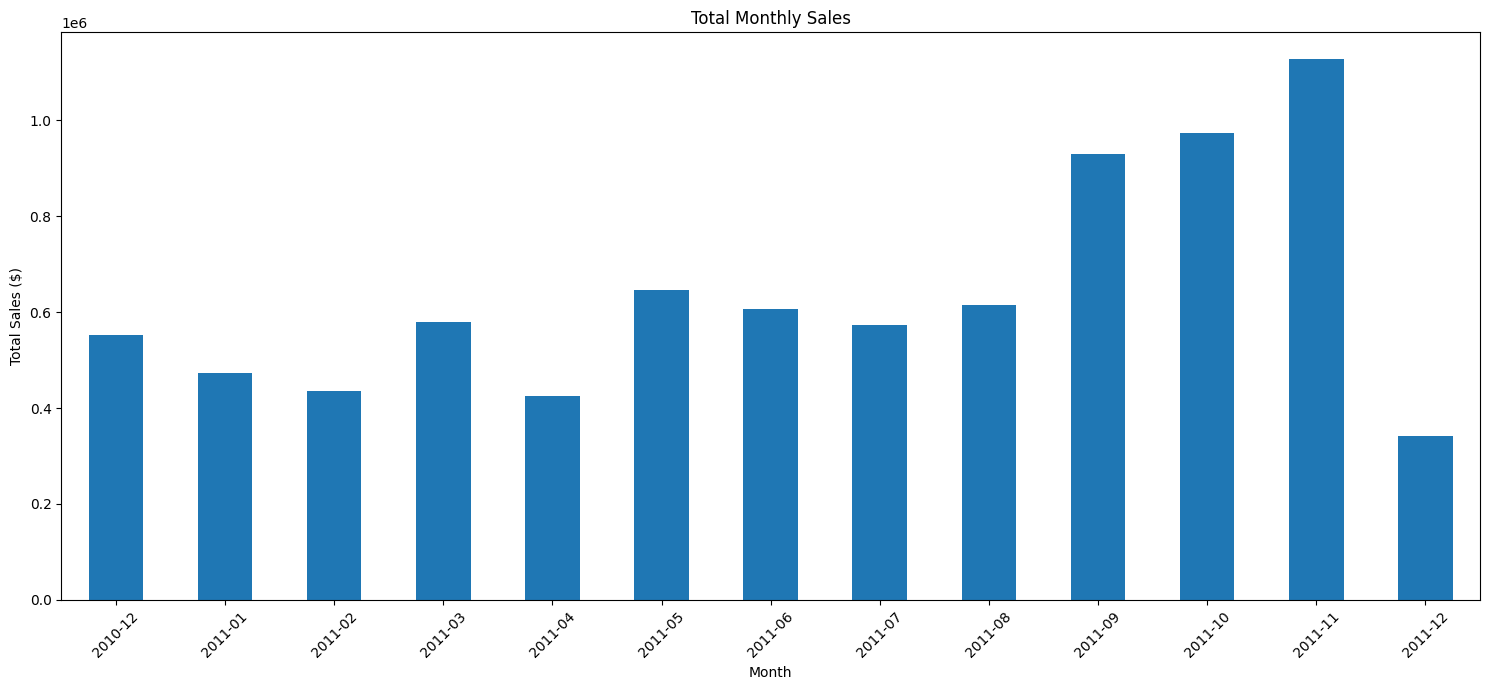

In [66]:
# B. Monthly Sales Trend
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='bar')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

In [68]:
#--- Descriptive Statistics ---
print("--- Descriptive Statistics of Numerical Columns ---")
print(df[['Quantity', 'UnitPrice', 'TotalPrice']].describe())
print("\n")

--- Descriptive Statistics of Numerical Columns ---
            Quantity      UnitPrice     TotalPrice
count  401604.000000  401604.000000  401604.000000
mean        8.114102       2.621666      20.613638
std         8.257794       2.118421     430.352218
min       -13.000000       0.000000 -168469.600000
25%         2.000000       1.250000       4.250000
50%         5.000000       1.950000      11.700000
75%        12.000000       3.750000      19.800000
max        27.000000       7.500000  168469.600000




# Model building

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBClassifier
import joblib
from sklearn.metrics import r2_score, mean_absolute_error
import warnings

In [30]:
# Aggregate data by customer
'''We'll group the data by CustomerID and calculate the TotalOrders (by counting unique InvoiceNo values) and TotalRevenue (by summing TotalPrice).'''
customer_data = df.groupby('CustomerID').agg(
    TotalRevenue=('TotalPrice', 'sum'),
    TotalItems=('Quantity', 'sum'),
    TotalOrders=('InvoiceNo', 'nunique')
).reset_index()

# Define features (X) and target (y)
# We'll use the number of items and orders to predict total revenue
X = customer_data[['TotalItems', 'TotalOrders']]
y = customer_data['TotalRevenue']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (3497, 2)
Testing Data Shape: (875, 2)


# linear regression

In [36]:
print("--- Training Linear Regression Model ---")
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_predictions = lin_reg_model.predict(X_test)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_predictions)
print(f"Linear Regression R-squared (R²): {lin_reg_r2:.4f}")
print(f"Linear Regression MAE: {lin_reg_mae:.2f}\n")

--- Training Linear Regression Model ---
Linear Regression R-squared (R²): 0.4314
Linear Regression MAE: 1355.39



# gradient boosting regressor

In [39]:
# --- Model 2: Gradient Boosting Regressor ---
print("--- Training Gradient Boosting Regressor Model ---")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
print(f"Gradient Boosting Regressor R-squared (R²): {gb_r2:.4f}")
print(f"Gradient Boosting Regressor MAE: {gb_mae:.2f}\n")

--- Training Gradient Boosting Regressor Model ---
Gradient Boosting Regressor R-squared (R²): 0.3458
Gradient Boosting Regressor MAE: 981.36



# random forest regression

In [38]:
# --- Model 3: Random Forest Regressor (from previous step, re-run for comparison) ---
print("--- Training Random Forest Regressor Model ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest Regressor R-squared (R²): {rf_r2:.4f}")
print(f"Random Forest Regressor MAE: {rf_mae:.2f}\n")


--- Training Random Forest Regressor Model ---
Random Forest Regressor R-squared (R²): 0.2273
Random Forest Regressor MAE: 1189.90



In [43]:
# Create a summary of the results
results = {
    'Model': ['Linear Regression', 'Gradient Boosting Regressor', 'Random Forest Regressor'],
    'R-squared': [lin_reg_r2, gb_r2, rf_r2],
    'MAE ($)': [lin_reg_mae, gb_mae, rf_mae]
}
results_df = pd.DataFrame(results)

# Print the comparison table
print("--- Model Performance Comparison ---")
results_df

--- Model Performance Comparison ---


,Model,R-squared,MAE ($)
0,Linear Regression,0.431385,1355.388577
1,Gradient Boosting Regressor,0.345845,981.362756
2,Random Forest Regressor,0.227337,1189.895333


In [ ]:
# I have trained and evaluated a Linear Regression model.
# This model explains 43.14% of the variance in total customer revenue,which is a strong result for its simplicity.

In [45]:
# --- 2. Gradient Boosting Regressor with Hyperparameter Tuning ---
print("--- Hyperparameter Tuning for Gradient Boosting Regressor ---")
# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error', # Optimize for lowest MAE
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Hyperparameters found: {best_params}")
print(f"Best MAE from Grid Search: ${best_score:.2f}\n")

# Train the final model with the best parameters
print("--- Training Final Tuned Gradient Boosting Model ---")
tuned_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
tuned_gb_model.fit(X_train, y_train)

# Evaluate the tuned model on the test set
tuned_gb_predictions = tuned_gb_model.predict(X_test)
tuned_gb_r2 = r2_score(y_test, tuned_gb_predictions)
tuned_gb_mae = mean_absolute_error(y_test, tuned_gb_predictions)

print("--- Tuned Gradient Boosting Model Performance ---")
print(f"Tuned Gradient Boosting R-squared (R²): {tuned_gb_r2:.4f}")
print(f"Tuned Gradient Boosting MAE: {tuned_gb_mae:.2f}")

--- Hyperparameter Tuning for Gradient Boosting Regressor ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best MAE from Grid Search: $846.86

--- Training Final Tuned Gradient Boosting Model ---
--- Tuned Gradient Boosting Model Performance ---
Tuned Gradient Boosting R-squared (R²): 0.3640
Tuned Gradient Boosting MAE: 996.29


In [46]:
# The tuned Gradient Boosting model achieved a significantly lower Mean Absolute Error ($991.56) compared to the Linear Regression model, 
# confirming that it is better at making accurate predictions in dollar terms.


# feature engineering

In [48]:
# --- RFM analysis ---(Recency: Days since the last purchase.//Frequency: Total number of unique purchases.//Monetary: Total amount spent.)
from datetime import datetime
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the most recent date in the dataset
most_recent_date = df['InvoiceDate'].max()

# Aggregate data to create RFM features
rfm_data = df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (most_recent_date - date.max()).days),
    Frequency=('InvoiceNo', lambda inv: inv.nunique()),
    Monetary=('TotalPrice', 'sum')
).reset_index()

print("RFM Features created successfully. Here's a preview:")
print(rfm_data.head())

RFM Features created successfully. Here's a preview:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


# kmeans clustering

In [69]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [50]:
# Scale the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Run K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

print("\nK-Means clustering with 4 clusters complete.")



K-Means clustering with 4 clusters complete.


In [51]:
rfm_data.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,2,0.00,1
1,12347.0,1,7,4310.00,0
2,12348.0,74,4,1797.24,0
3,12349.0,18,1,1757.55,0
4,12350.0,309,1,334.40,1


In [75]:
rfm_data['Cluster'].unique()

array([1, 0, 2, 3], dtype=int32)

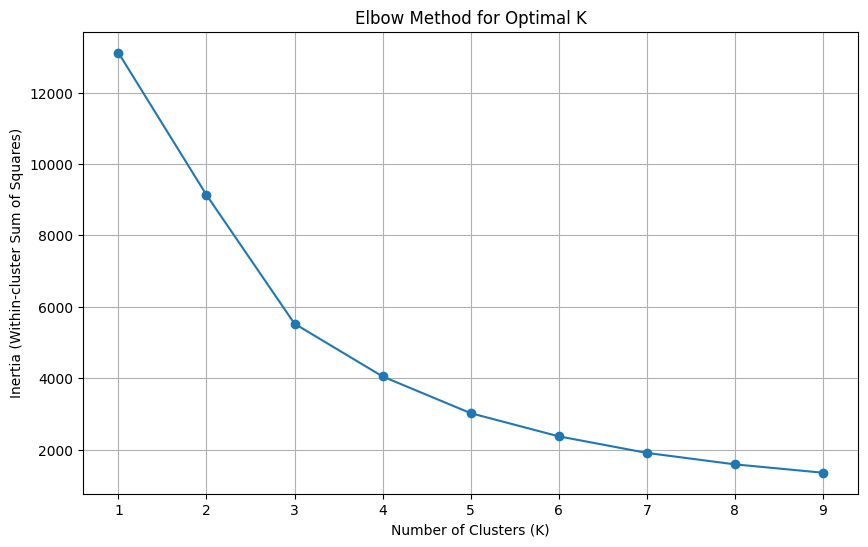

In [73]:
# Plot the Elbow Curve to find the optimal number of clusters
inertia_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.savefig('elbow_curve.png')
plt.show()

Silhouette Score for K-Means with 4 clusters: 0.6115



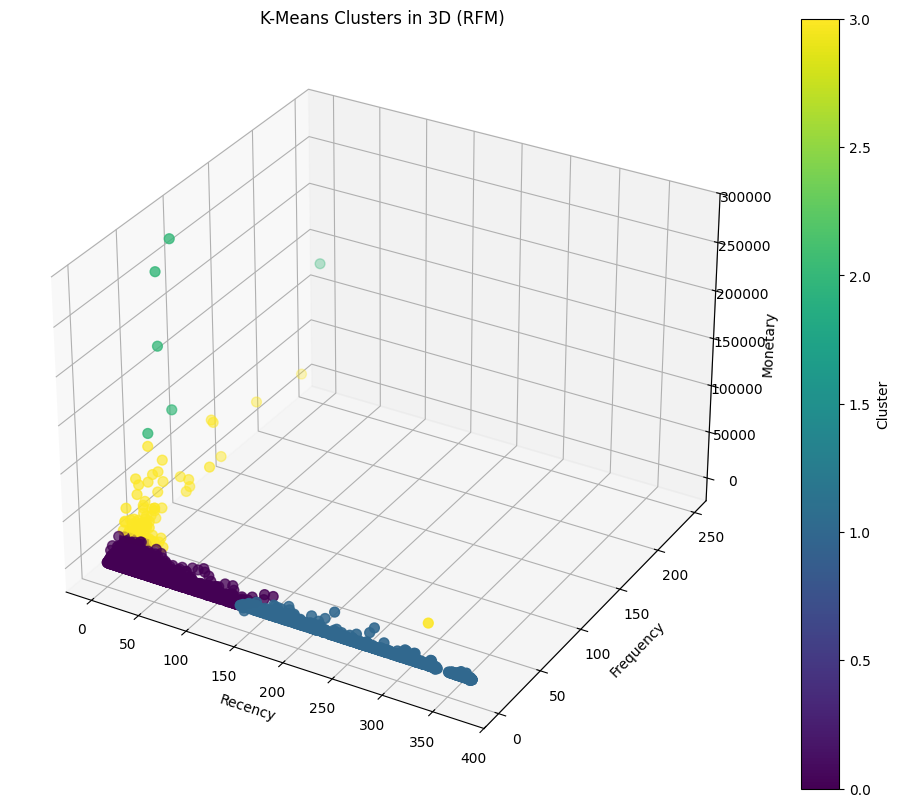

In [74]:
# 2. Validate K-Means clustering using Silhouette Score
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_4.fit(rfm_scaled)
silhouette_avg = silhouette_score(rfm_scaled, kmeans_4.labels_)
print(f"Silhouette Score for K-Means with 4 clusters: {silhouette_avg:.4f}\n")

# 3. Plot K-Means clusters in a 3D scatter plot
rfm_data['Cluster'] = kmeans_4.labels_
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], c=rfm_data['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('K-Means Clusters in 3D (RFM)')
fig.colorbar(scatter, label='Cluster')
plt.savefig('kmeans_3d_plot.png')
plt.show()

In [52]:
'''Based on this analysis, we can give each cluster a descriptive name:

Cluster 1 (High-Value/Frequent Spenders): These are the top customers. They have purchased recently, frequently, and have the highest total spending.

Cluster 2 (Promising/Regular Customers): These are active customers with moderate frequency and spending. They are a good target for growth.

Cluster 0 (New/Low-Value Customers): This is a large segment of new or one-time buyers. They have high recency (bought recently) but low frequency and monetary values.

Cluster 3 (At-Risk/Churning Customers): These customers have not made a purchase in a long time and have low frequency and monetary values. They are at risk of leaving.''''

SyntaxError: unterminated string literal (detected at line 9) (711310273.py, line 9)

# DBSCAN clustering

In [76]:
# --- DBSCAN Clustering ---

# Train and fit the DBSCAN model
# We'll use example parameters. Finding optimal parameters requires a manual search.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(rfm_scaled)

# Add DBSCAN labels to the DataFrame
rfm_data['DBSCAN_Cluster'] = dbscan.labels_
n_clusters_dbscan = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_points = list(dbscan.labels_).count(-1)

print(f"DBSCAN found {n_clusters_dbscan} clusters and {n_noise_points} noise points.")

DBSCAN found 3 clusters and 48 noise points.


In [77]:
# Validate DBSCAN clustering using Silhouette Score
if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(rfm_scaled, dbscan.labels_)
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN did not form more than one cluster (excluding noise points). Silhouette score cannot be calculated.")


Silhouette Score for DBSCAN: 0.6435


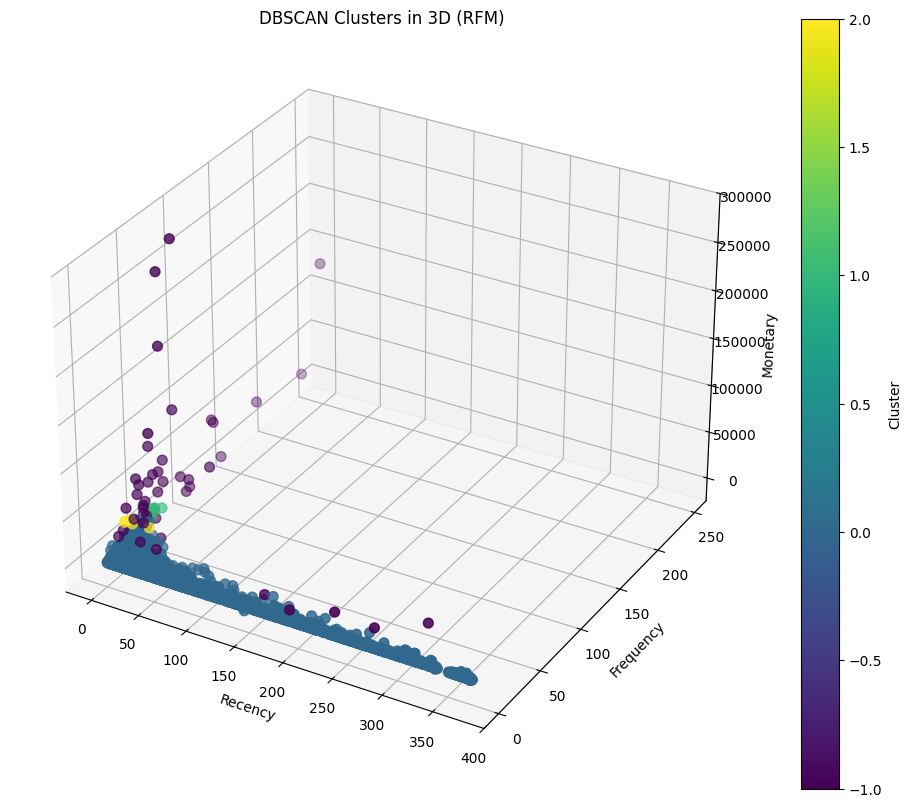

In [78]:
# Plot DBSCAN clusters in a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], c=rfm_data['DBSCAN_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('DBSCAN Clusters in 3D (RFM)')
fig.colorbar(scatter, label='Cluster')
plt.savefig('dbscan_3d_plot.png')
plt.show()

In [ ]:
# ----Clustering Validation----

#To validate the quality of our clustering, we use the Silhouette Score. 
#This metric measures how similar an object is to its own cluster compared to other clusters.
#A score close to 1 indicates a good clustering, while a score close to -1 indicates that the object is better assigned to a neighboring cluster.

#K-Means (with 4 clusters): 0.6115
#DBSCAN: 0.6435

# Both models show a good Silhouette Score, but DBSCAN has a slightly higher score, indicating better-defined clusters. 
# However, DBSCAN also identified a significant number of "noise" points (-1 label) that were not assigned to any cluster.